In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

In [3]:
data = pd.read_csv('cvd/data1.csv')
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,129,8,0,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,129,8,1,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1081,0,0,2,35.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1082,3,1,1,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1083,25,9,1,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isna().sum()

location         0
country          0
gender           0
age            242
sym_on         636
hosp_vis       636
vis_wuhan        0
from_wuhan       4
death            0
recov            0
symptom1       815
symptom2       924
symptom3      1012
symptom4      1066
symptom5      1082
symptom6      1084
dtype: int64

In [5]:
data['symptom1'] = encoder.fit_transform(data['symptom1'].astype(str))
data['symptom2'] = encoder.fit_transform(data['symptom2'].astype(str))
data['symptom3'] = encoder.fit_transform(data['symptom3'].astype(str))
data['symptom4'] = encoder.fit_transform(data['symptom4'].astype(str))
data['symptom5'] = encoder.fit_transform(data['symptom5'].astype(str))
data['symptom6'] = encoder.fit_transform(data['symptom6'].astype(str))

In [6]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
#data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [7]:
data['diff_symp_hos'] = data['hosp_vis']-data['sym_on']

In [8]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [9]:
#data = data.drop(['symptom1','symptom2','symptom3','symptom4','symptom5','symptom6'],axis=1)

In [10]:
print(data.dtypes)

location           int32
country            int32
gender             int32
age              float64
vis_wuhan          int64
from_wuhan       float64
death              int64
recov              int64
symptom1           int32
symptom2           int32
symptom3           int32
symptom4           int32
symptom5           int32
symptom6           int32
diff_symp_hos      int64
dtype: object


In [11]:
data

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,3,1,1,NaN,0,0.0,0,0,17,31,23,12,3,1,0
1083,25,9,1,NaN,0,0.0,0,0,17,31,23,12,3,1,0


In [12]:
data.isna().sum()

location           0
country            0
gender             0
age              242
vis_wuhan          0
from_wuhan         4
death              0
recov              0
symptom1           0
symptom2           0
symptom3           0
symptom4           0
symptom5           0
symptom6           0
diff_symp_hos      0
dtype: int64

In [13]:
val=data['age'].mean().astype(int)
val

49

In [14]:
val1=data['from_wuhan'].mean().astype(int)
val1

0

In [15]:
values = {"age": val, 'from_wuhan':val1}

In [16]:
data2=data.fillna(value=values)

In [17]:
data2

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0


In [18]:
data2.isna().sum()

location         0
country          0
gender           0
age              0
vis_wuhan        0
from_wuhan       0
death            0
recov            0
symptom1         0
symptom2         0
symptom3         0
symptom4         0
symptom5         0
symptom6         0
diff_symp_hos    0
dtype: int64

In [19]:
data3=data2.dropna()

In [20]:
data3

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0


In [21]:
X1=data3.copy()
y1=data3['death'].copy()

In [22]:
X1=X1.drop(columns=['death'])
X1

,location,country,gender,age,vis_wuhan,from_wuhan,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,17,31,23,12,3,1,0


In [23]:
X1.shape, y1.shape

((1085, 14), (1085,))

In [24]:
X1

,location,country,gender,age,vis_wuhan,from_wuhan,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,17,31,23,12,3,1,0


In [25]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: death, Length: 1085, dtype: int64

In [26]:
################## Correlation

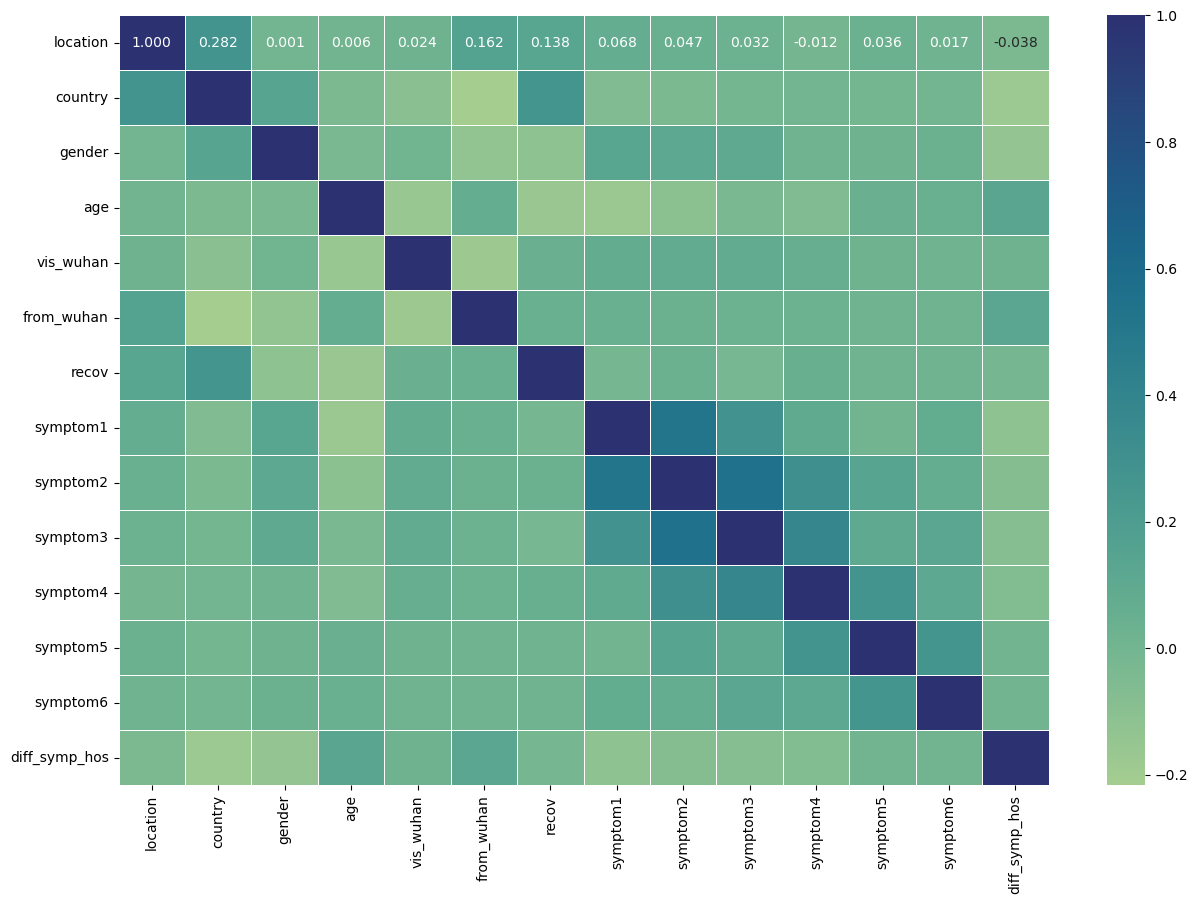

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation matrix
cor = X1.corr()

# Plotting Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True,fmt=".3f", linewidth=.5,cmap="crest")
plt.savefig("corr.png")
plt.show()

In [28]:
cor

,location,country,gender,age,vis_wuhan,from_wuhan,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
location,1.000000,0.281899,0.000653,0.005721,0.024117,0.161607,0.137583,0.067779,0.047345,0.031851,-0.011929,0.035774,0.016648,-0.038124
country,0.281899,1.000000,0.140118,-0.039959,-0.102454,-0.216868,0.260023,-0.059876,-0.035251,-0.005474,-0.001864,-0.006223,0.000537,-0.176815
gender,0.000653,0.140118,1.000000,-0.029639,0.007664,-0.133192,-0.115152,0.137400,0.113751,0.106362,0.014603,0.022109,0.035537,-0.136998
age,0.005721,-0.039959,-0.029639,1.000000,-0.164450,0.068170,-0.169174,-0.172613,-0.103744,-0.027300,-0.058068,0.041546,0.046034,0.131159
vis_wuhan,0.024117,-0.102454,0.007664,-0.164450,1.000000,-0.183128,0.040042,0.076056,0.082966,0.086986,0.055790,0.022600,0.014083,0.022545
from_wuhan,0.161607,-0.216868,-0.133192,0.068170,-0.183128,1.000000,0.045600,0.048828,0.036581,0.028533,0.029425,0.019973,0.012446,0.121608
recov,0.137583,0.260023,-0.115152,-0.169174,0.040042,0.045600,1.000000,-0.014962,0.036762,-0.021328,0.049857,0.020197,0.012586,-0.013284
symptom1,0.067779,-0.059876,0.137400,-0.172613,0.076056,0.048828,-0.014962,1.000000,0.520321,0.285064,0.092241,0.002241,0.080768,-0.112603
symptom2,0.047345,-0.035251,0.113751,-0.103744,0.082966,0.036581,0.036762,0.520321,1.000000,0.549681,0.307110,0.148848,0.068236,-0.078633
symptom3,0.031851,-0.005474,0.106362,-0.027300,0.086986,0.028533,-0.021328,0.285064,0.549681,1.000000,0.378506,0.103839,0.124080,-0.087891


In [32]:
thr=.3
for i in list(cor.columns):
##    for j in list(cor.index):
     for j in list(cor.index):
        if i!=j and cor[i][j]>thr:
            print (cor[i][j], i, j)
        #else: break

0.5203209529286975 symptom1 symptom2
0.5203209529286975 symptom2 symptom1
0.549680890106337 symptom2 symptom3
0.30711033945197236 symptom2 symptom4
0.549680890106337 symptom3 symptom2
0.3785058779013361 symptom3 symptom4
0.30711033945197236 symptom4 symptom2
0.3785058779013361 symptom4 symptom3


In [34]:
thr=.25
for ind1, i in enumerate(cor.columns):
    for ind2, j in enumerate(cor.index):
        if ind1<ind2 and cor[i][j]>thr:
            print(ind1,  cor[i][j],i,j)

0 0.28189916512683294 location country
1 0.26002251218728817 country recov
7 0.5203209529286975 symptom1 symptom2
7 0.28506376322237886 symptom1 symptom3
8 0.549680890106337 symptom2 symptom3
8 0.30711033945197236 symptom2 symptom4
9 0.3785058779013361 symptom3 symptom4
10 0.2784648060739696 symptom4 symptom5
11 0.26622152208417454 symptom5 symptom6


In [35]:
#####################VarianceThreshold

In [56]:
from sklearn.feature_selection import VarianceThreshold

# Resetting the value of X to make it non-categorical
#X = array[:, 0:14]

v_threshold = VarianceThreshold(threshold=70)
v_threshold.fit(X1)  # fit finds the features with zero variance
v_threshold.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False])

In [58]:
v_threshold1 = VarianceThreshold(threshold=60)
v_threshold1.fit(X1)  # fit finds the features with zero variance
v_threshold1.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False])

In [64]:
v_threshold2 = VarianceThreshold(threshold=16)
v_threshold2.fit(X1)  # fit finds the features with zero variance
v_threshold2.get_support()

array([ True,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False])

In [69]:
v_threshold3 = VarianceThreshold(threshold=5)
v_threshold3.fit(X1)  # fit finds the features with zero variance
v_threshold3.get_support()

array([ True,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True])